# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Loading the processed data

In [2]:
data = pd.read_csv('processed_data-Copy1.csv')

### So as to avoid unnecessary warnings which won't affect our analysis

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Exploring the data

In [4]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Ex-Showroom_Price,Displacement,Cylinders,Fuel_Tank_Capacity,Width,Kerb_Weight,Gears,12v_Power_Outlet,Number_of_Airbags,Length_new,Average_Mileage
count,1251.000000,1251.000000,1.251000e+03,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,639.936051,639.936051,4.440676e+06,1856.765323,4.370152,52.285992,1790.940274,1391.388952,5.891798,1.992714,3.807520,3475.446443,43.919126
std,368.044911,368.044911,1.060184e+07,1043.064634,1.584046,16.117501,142.349878,411.523175,1.130870,0.309763,2.389245,341.834345,383.562317
min,0.000000,0.000000,2.364470e+05,72.000000,2.000000,15.000000,1312.000000,660.000000,4.000000,1.000000,1.000000,1562.000000,3.000000
25%,325.500000,325.500000,7.437520e+05,1198.000000,4.000000,41.000000,1695.000000,1105.000000,5.000000,2.000000,2.000000,3222.500000,15.100000
50%,640.000000,640.000000,1.083000e+06,1497.000000,4.000000,50.000000,1777.000000,1391.388952,5.891798,2.000000,2.000000,3484.500000,18.300000
75%,961.500000,961.500000,2.993900e+06,1998.000000,4.000000,60.000000,1853.000000,1562.000000,6.000000,2.000000,6.000000,3672.500000,22.100000
max,1275.000000,1275.000000,1.921429e+08,7993.000000,16.000000,105.000000,2226.000000,2962.000000,9.000000,4.000000,14.000000,4988.000000,13029.160000


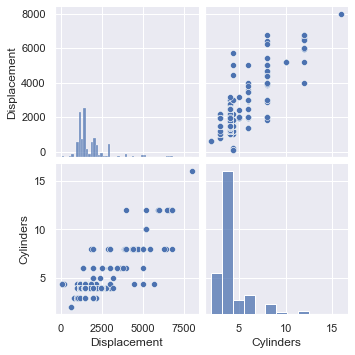

In [5]:

df = data[['Displacement','Cylinders']]
sns.pairplot(df)
plt.show()

In [6]:
data['Displacement'].corr(data['Cylinders'])

0.8718209977135952

##### Cylinder number and Displacement are related which is true as we all know that displacement is the combined volume of all its cylinders and hence dispalcement becomes redundant here in predictive analytics.

In [7]:
data = data.drop(["Displacement"], axis=1)

In [8]:
nums=['Ex-Showroom_Price','Cylinders','Fuel_Tank_Capacity','Width','Kerb_Weight','Gears','12v_Power_Outlet','Number_of_Airbags','Length_new','Average_Mileage']

## Pair plots between numerical variables so as to check for linear relationships and explore the possibility of a linear regression.

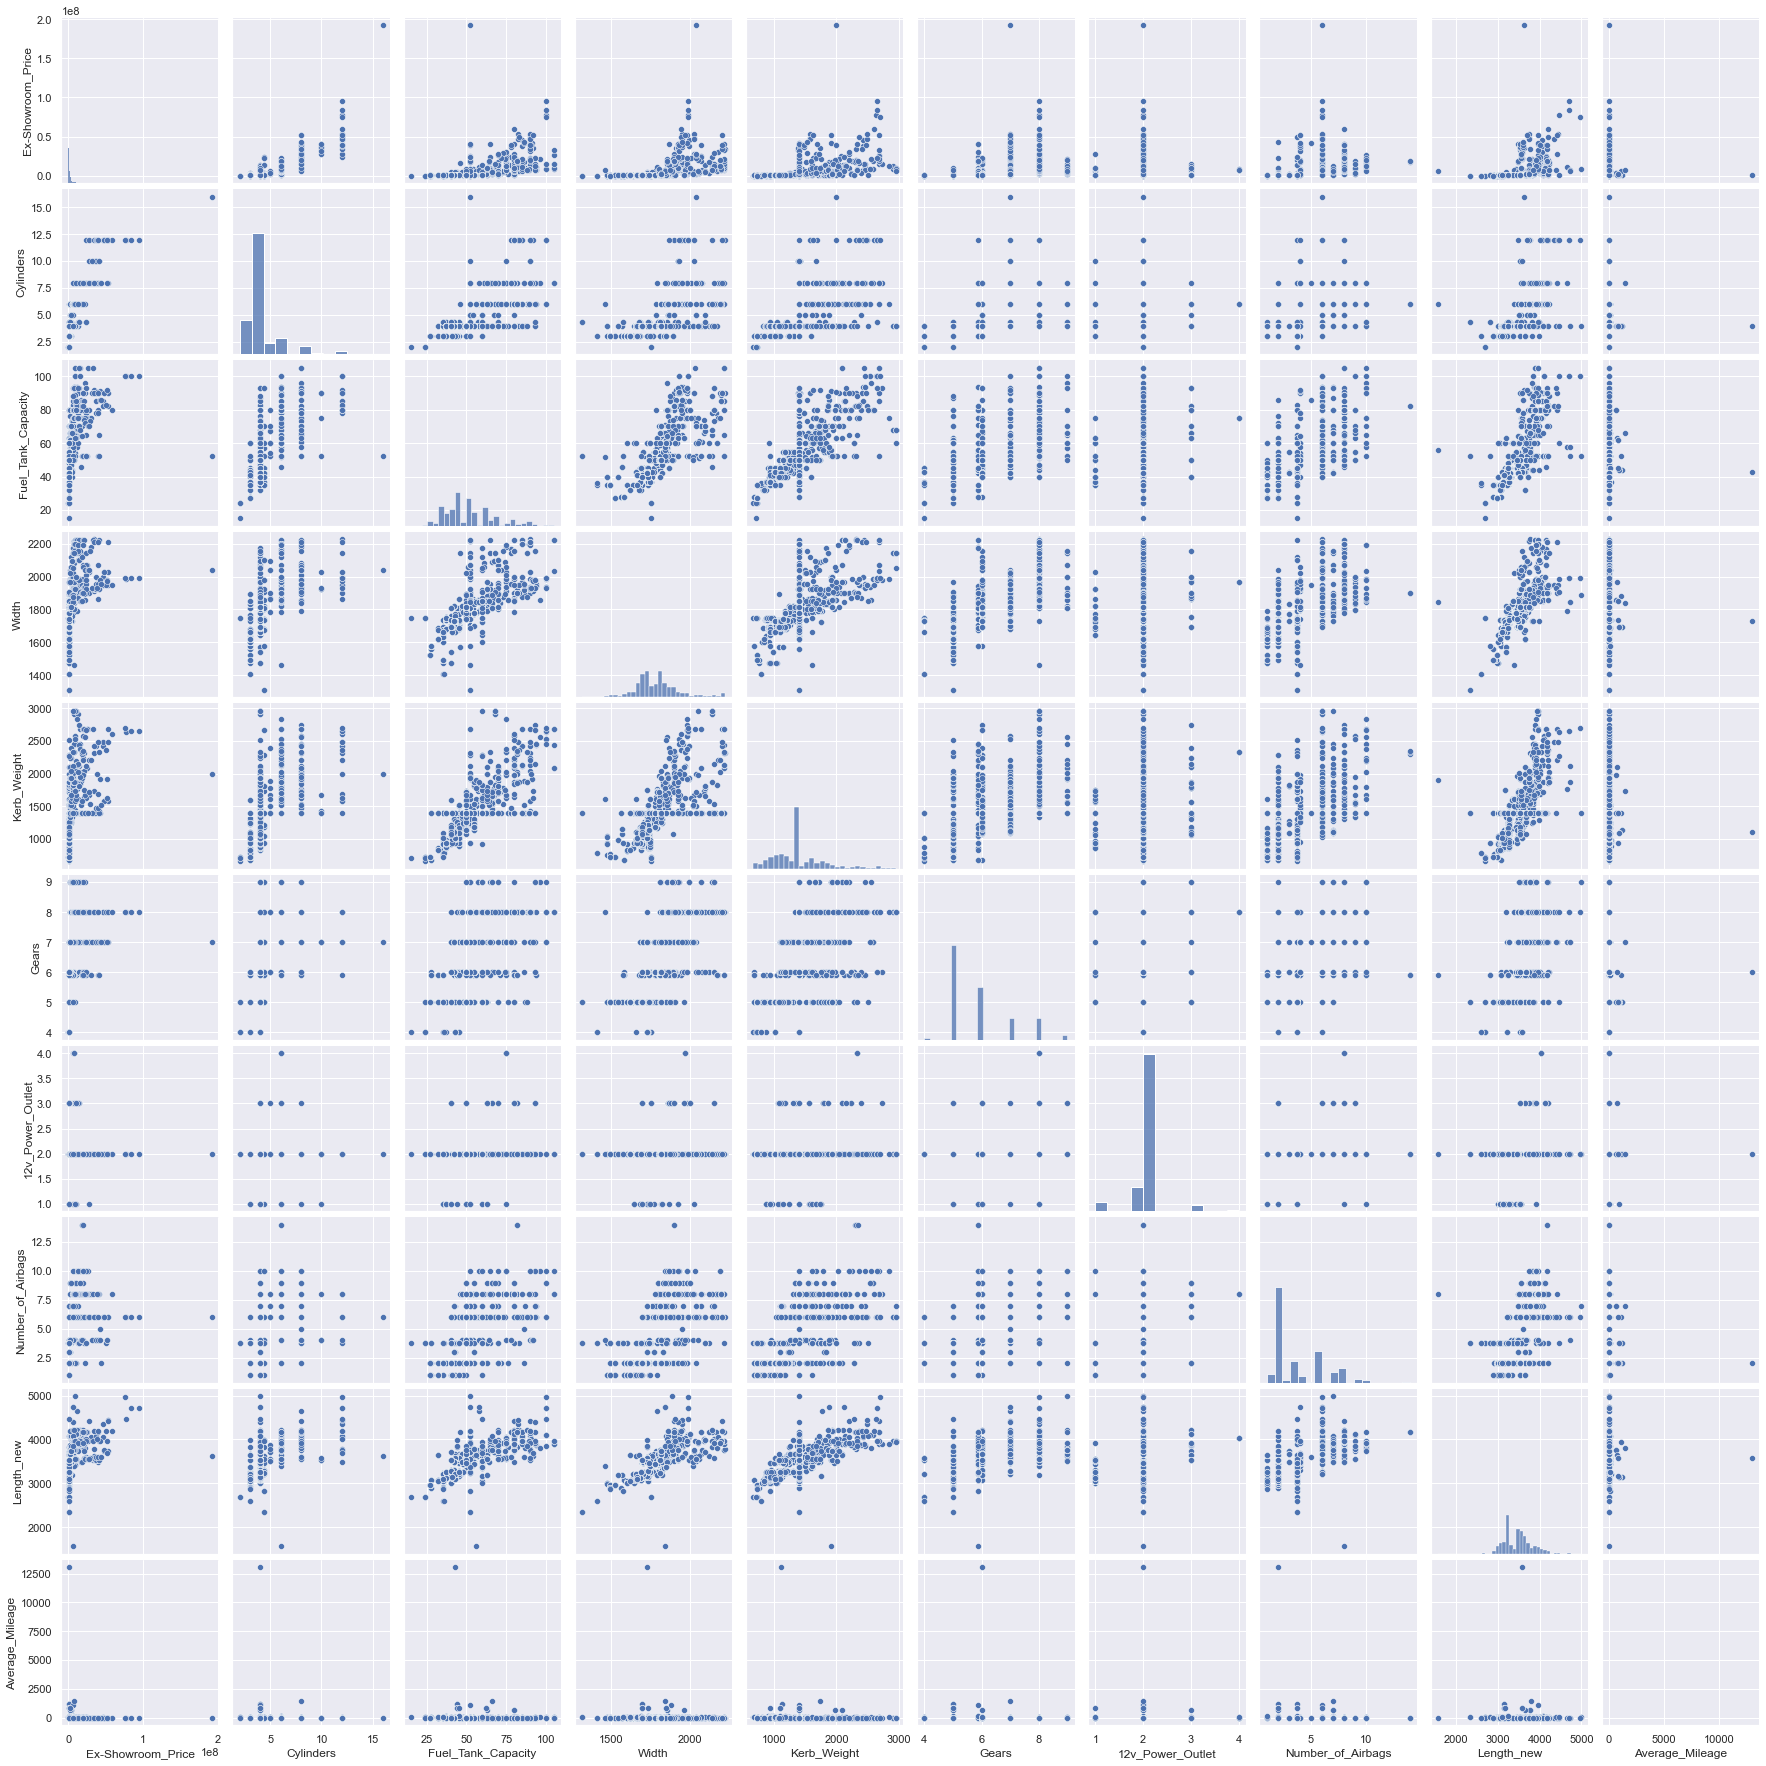

In [9]:
sns.pairplot(data[nums])

###### As evident from the pair plots above, there are certain features which show linear relationships and thus they can be considered important predictive parameters for linear regression.

In [10]:
data.dtypes

Unnamed: 0                  int64
Unnamed: 0.1                int64
Make                       object
Ex-Showroom_Price         float64
Cylinders                 float64
Drivetrain                 object
Cylinder_Configuration     object
Emission_Norm              object
Engine_Location            object
Fuel_System                object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Width                     float64
Body_Type                  object
Kerb_Weight               float64
Gears                     float64
Front_Brakes               object
Rear_Brakes                object
Front_Suspension           object
Rear_Suspension            object
Front_Tyre_&_Rim           object
Rear_Tyre_&_Rim            object
Power_Steering             object
Power_Windows              object
Keyless_Entry              object
Power                      object
Seats_Material             object
Type                       object
12v_Power_Outlet          float64
Audiosystem   

In [11]:
data['Drivetrain'].value_counts()

FWD (Front Wheel Drive)    872
RWD (Rear Wheel Drive)     168
AWD (All Wheel Drive)      152
FWD                         59
Name: Drivetrain, dtype: int64

In [12]:
data['Drivetrain']=data['Drivetrain'].replace('FWD','FWD (Front Wheel Drive)')

##### Cleaning and collaborating the 'Basic Warranty' feature so as to reduce the number of unique values.

In [13]:
data['Basic_Warranty'].value_counts()

2 years / Unlimited Kms                                            566
3 years / Unlimited Kms                                            118
2 years /40000 Kms (years/distance whichever comes first)          101
3 years /100000 Kms (years/distance whichever comes first)          85
3 Years/1,00,000 Kms (Whichever comes earlier)                      77
2 Years / 40,000 Kms (Whichever comes earlier)                      54
2 Years / 100,000 Kms (whichever comes first)                       41
2 years /75000 Kms (years/distance whichever comes first)           31
2 years /1,00,000 Kms (years/distance whichever comes first)        30
24 months /50000 Kms (whichever comes first)                        20
2 years /50000 Kms (years/distance whichever comes first)           18
2 Years / 75,000 KM (whichever is earlier)                          17
2 Years / 50,000 Kms (Whichever comes earlier)                      16
3 Years / 100000 km (whichever comes first)                         11
3 year

In [14]:
data = data.drop(["Clock",'Front_Tyre_&_Rim','Rear_Tyre_&_Rim','Front_Suspension','Rear_Suspension','Airbags'], axis=1)

In [15]:
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years /40000 Kms (years/distance whichever comes first)','2 years / 40,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years /100000 Kms (years/distance whichever comes first)','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 Years/1,00,000 Kms (Whichever comes earlier)','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years / 40,000 Kms (Whichever comes earlier)','2 years / 40,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years / 100,000 Kms (whichever comes first)','2 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years /75000 Kms (years/distance whichever comes first)','2 years / 75,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years /1,00,000 Kms (years/distance whichever comes first)','2 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('24 months /50000 Kms (whichever comes first)','2 years / 50,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years /50000 Kms (years/distance whichever comes first)','2 years / 50,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years / 75,000 KM (whichever is earlier)','2 years / 75,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years / 50,000 Kms (Whichever comes earlier)','2 years / 50,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 Years / 100000 km (whichever comes first)','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years / 100,000 Km of warranty**','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3rd years /Unlimited Kms (years/distance whichever comes first)','3 years / Unlimited Kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years / 100,000 Kms','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('4 years /Unlimited Kms (years/distance whichever comes first)','4 years / Unlimited Kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('4 years / 80000 Kms (years/distance whichever comes first)','4 years / 80,000 kms')

In [16]:
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years/1 lakh kms (whichever is earlier)','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('8 yrs/1.6L kmBattery Warranty','8 years / 160,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('1 Year /Unlimited KMs','1 years / Unlimited kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years/40,000 km','3 years / 40,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years Unlimited Kilometres','2 years / Unlimited kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years 60000 kms','3 years / 60,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years without mileage limit','2 years / Unlimited kms')

In [17]:
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 Years Warranty','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years Warranty','3 years / 40,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years / Unlimited Kms','2 years / Unlimited kms')


In [18]:
data['Basic_Warranty'].value_counts()

2 years / Unlimited kms    571
3 years / 100,000 kms      202
2 years / 40,000 kms       155
3 years / Unlimited Kms    125
2 years / 100,000 kms       71
2 years / 50,000 kms        54
2 years / 75,000 kms        48
4 years / Unlimited Kms      7
3 years / 40,000 kms         5
4 years / 80,000 kms         5
1 years / Unlimited kms      3
8 years / 160,000 kms        3
3 years / 60,000 kms         2
Name: Basic_Warranty, dtype: int64

In [19]:
data=data.drop(['Third_Row_AC_Vents','Fuel-lid_Opener'],axis=1)

## Converting categorical variables having very few unique variables into numerical ones by replacing the values with sensible numbers 

### By 'sensible numbering' it is implied that we don't end up creating some ordered relationship while encoding random features. (For e.g. '4' is twice of '2' but there might not be any such relation existing between those values.

In [20]:
data['Handbrake'].value_counts()

Manual       949
Automatic    302
Name: Handbrake, dtype: int64

In [21]:
data['Handbrake']=data['Handbrake'].replace({'Manual':0, 'Automatic':1})

In [22]:
data['Power_Windows'].value_counts()

All Windows           1109
Only Front Windows     142
Name: Power_Windows, dtype: int64

In [23]:
data['Power_Windows']=data['Power_Windows'].replace({'Only Front Windows':0, 'All Windows':1})

In [24]:
data['Parking_Assistance'].value_counts()

Rear sensors              929
Front and rear sensors    322
Name: Parking_Assistance, dtype: int64

In [25]:
data['Parking_Assistance']=data['Parking_Assistance'].replace({'Rear sensors':0, 'Front and rear sensors':1})

In [26]:
data['Ventilation_System'].value_counts()

Fully automatic climate control                                                      508
Manual Air conditioning with cooling and heating                                     438
2 Zone Climate Control                                                               146
4 Zone climate control                                                                59
3 Zone climate control                                                                35
Air Conditioning with cooling only                                                    22
Fully automatic climate control, 2 Zone Climate Control                               10
Yes                                                                                    8
Heater, Manual Air conditioning with cooling and heating                               6
Fully automatic climate control, 4 Zone climate control                                6
Heater                                                                                 4
Heater, Fully automat

In [27]:
data['Ventilation_System']=data['Ventilation_System'].replace('2 Zone Climate Control, Fully automatic climate control','Fully automatic climate control, 2 Zone Climate Control')
data['Ventilation_System']=data['Ventilation_System'].replace('Yes','Fully automatic climate control')
data['Ventilation_System']=data['Ventilation_System'].replace('Manual Air conditioning with cooling and heating, Fully automatic climate control','Manual Air conditioning with cooling and heating')


In [28]:
data=data.drop(['Emission_Norm','Unnamed: 0'],axis=1)

In [29]:
data=data.drop(['Unnamed: 0.1'], axis=1)

In [30]:
data['Rear_Brakes'].value_counts()

Drum               786
Ventilated Disc    421
Solid Disc          44
Name: Rear_Brakes, dtype: int64

In [31]:
data['Rear_Brakes']=data['Rear_Brakes'].replace({'Drum':0, 'Solid Disc':1,'Ventilated Disc':2})
data['Front_Brakes']=data['Front_Brakes'].replace({'Drum':0, 'Solid Disc':1,'Ventilated Disc':2})

# Installing the relevant packages for employing Target Encoding

In [32]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [33]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Make'],data['Ex-Showroom_Price'])
df.head()

,Make
0,937114.57
1,937114.57
2,937114.57
3,937114.57
4,937114.57


In [34]:
data=df.join(data.drop(['Make'],axis=1))
data.head()

,Make,Ex-Showroom_Price,Cylinders,Drivetrain,Cylinder_Configuration,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Width,...,Audiosystem,Basic_Warranty,Handbrake,Instrument_Console,Ventilation_System,Number_of_Airbags,Parking_Assistance,Seat_Height_Adjustment,Length_new,Average_Mileage
0,937114.57,292667.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,24.0,Petrol,1750.0,...,"CD/MP3/DVD, USB, Aux-in","2 years / 75,000 kms",0,Analog + Digital,Manual Air conditioning with cooling and heating,3.80752,0,Manual Adjustment,2697.0,23.600000
1,937114.57,236447.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,24.0,Petrol,1750.0,...,Not on offer,"2 years / 75,000 kms",0,Analog + Digital,Fully automatic climate control,3.80752,0,Manual Adjustment,2697.0,23.600000
2,937114.57,296661.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,15.0,CNG,1750.0,...,Not on offer,"2 years / 75,000 kms",0,Analog + Digital,Air Conditioning with cooling only,3.80752,0,Manual Adjustment,2697.0,43.919126
3,937114.57,334768.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,24.0,Petrol,1750.0,...,"CD/MP3/DVD, USB, Aux-in","2 years / 75,000 kms",0,Analog + Digital,Manual Air conditioning with cooling and heating,3.80752,0,Manual Adjustment,2697.0,22.750000
4,937114.57,272223.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,24.0,Petrol,1750.0,...,Not on offer,"2 years / 75,000 kms",0,Analog + Digital,Air Conditioning with cooling only,3.80752,0,Manual Adjustment,2697.0,23.600000


In [35]:
data['Drivetrain'].value_counts()

FWD (Front Wheel Drive)    931
RWD (Rear Wheel Drive)     168
AWD (All Wheel Drive)      152
Name: Drivetrain, dtype: int64

In [36]:
data['Drivetrain']=data['Drivetrain'].replace({'FWD (Front Wheel Drive)':1, 'RWD (Rear Wheel Drive)':0,'AWD (All Wheel Drive)':2})

In [37]:
data['Fuel_System'].value_counts()

Injection    1248
PGM - Fi        3
Name: Fuel_System, dtype: int64

In [38]:
data['Fuel_System']=data['Fuel_System'].replace({'Injection':1, 'PGM - Fi':2})

In [39]:
data['Keyless_Entry'].value_counts()

Remote       778
Smart Key    452
Both          21
Name: Keyless_Entry, dtype: int64

In [40]:
data['Keyless_Entry']=data['Keyless_Entry'].replace({'Remote':0, 'Both':1, 'Smart Key':2})

In [41]:
data['Type']=data['Type'].replace({'Manual':0, 'Automatic':1})

# Target Encoding
##### One of the most efficient ways of dealing with categorical predictors with more number of unique values is the target encoding because not only it saves us from huge space consumption but also from multidimensionality arising from columns having high cardinality in case of one hot encoding method.

In [42]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Basic_Warranty'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Basic_Warranty'],axis=1))

In [43]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Body_Type'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Body_Type'],axis=1))

In [44]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Power'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Power'],axis=1))

In [45]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Seats_Material'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Seats_Material'],axis=1))

In [46]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Ventilation_System'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Ventilation_System'],axis=1))

In [47]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Engine_Location'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Engine_Location'],axis=1))

In [48]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Seat_Height_Adjustment'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Seat_Height_Adjustment'],axis=1))

In [49]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Fuel_Type'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Fuel_Type'],axis=1))

In [50]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Cylinder_Configuration'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Cylinder_Configuration'],axis=1))

In [51]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Audiosystem'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Audiosystem'],axis=1))

In [52]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Power_Steering'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Power_Steering'],axis=1))

In [53]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df=tenc.fit_transform(data['Instrument_Console'],data['Ex-Showroom_Price'])
data=df.join(data.drop(['Instrument_Console'],axis=1))

In [54]:
data.head()

,Instrument_Console,Power_Steering,Audiosystem,Cylinder_Configuration,Fuel_Type,Seat_Height_Adjustment,Engine_Location,Ventilation_System,Seats_Material,Power,...,Rear_Brakes,Power_Windows,Keyless_Entry,Type,12v_Power_Outlet,Handbrake,Number_of_Airbags,Parking_Assistance,Length_new,Average_Mileage
0,4.138709e+06,3.724874e+06,5.241998e+06,2.047729e+06,6.053733e+06,1.134629e+06,2.320831e+07,7.730893e+05,1.018871e+06,319034.898446,...,0,0,0,0,2.0,0,3.80752,0,2697.0,23.600000
1,4.138709e+06,3.724874e+06,6.934611e+05,2.047729e+06,6.053733e+06,1.134629e+06,2.320831e+07,5.797682e+06,1.018871e+06,319034.898446,...,0,1,0,0,2.0,0,3.80752,0,2697.0,23.600000
2,4.138709e+06,3.724874e+06,6.934611e+05,2.047729e+06,4.922394e+05,1.134629e+06,2.320831e+07,7.784037e+05,1.018871e+06,319034.898446,...,0,1,0,0,2.0,0,3.80752,0,2697.0,43.919126
3,4.138709e+06,3.724874e+06,5.241998e+06,2.047729e+06,6.053733e+06,1.134629e+06,2.320831e+07,7.730893e+05,1.018871e+06,319034.898446,...,0,0,0,1,2.0,0,3.80752,0,2697.0,22.750000
4,4.138709e+06,3.724874e+06,6.934611e+05,2.047729e+06,6.053733e+06,1.134629e+06,2.320831e+07,7.784037e+05,1.018871e+06,319034.898446,...,0,1,0,0,2.0,0,3.80752,0,2697.0,23.600000


In [55]:
data.dtypes

Instrument_Console        float64
Power_Steering            float64
Audiosystem               float64
Cylinder_Configuration    float64
Fuel_Type                 float64
Seat_Height_Adjustment    float64
Engine_Location           float64
Ventilation_System        float64
Seats_Material            float64
Power                     float64
Body_Type                 float64
Basic_Warranty            float64
Make                      float64
Ex-Showroom_Price         float64
Cylinders                 float64
Drivetrain                  int64
Fuel_System                 int64
Fuel_Tank_Capacity        float64
Width                     float64
Kerb_Weight               float64
Gears                     float64
Front_Brakes                int64
Rear_Brakes                 int64
Power_Windows               int64
Keyless_Entry               int64
Type                        int64
12v_Power_Outlet          float64
Handbrake                   int64
Number_of_Airbags         float64
Parking_Assist

## Checking for possible outliers
##### Presence of outliers leads to deviation from the standard normalized graphs. Removing them helps achieve robust standardization of the data.

<AxesSubplot:xlabel='Ex-Showroom_Price', ylabel='Density'>

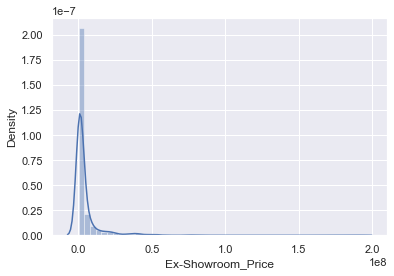

In [56]:
sns.distplot(data['Ex-Showroom_Price'])

##### There are many ways to remove outliers, one of the common ones are excluding the data that are beyond 99 percentile and below 0.1 percentile. This basically means that we are removing the observations which lie far away from the regular distribution or the hyperplane and they have the ability to distort the regression model because of their exceptional values.

<AxesSubplot:xlabel='Ex-Showroom_Price', ylabel='Density'>

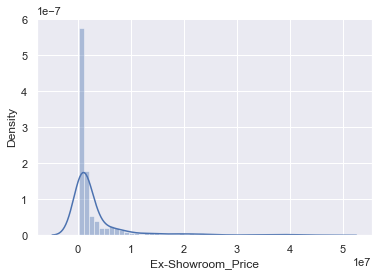

In [58]:
q=data['Ex-Showroom_Price'].quantile(0.99)
data1=data[data['Ex-Showroom_Price']<q]
sns.distplot(data1['Ex-Showroom_Price'])

<AxesSubplot:xlabel='Kerb_Weight', ylabel='Density'>

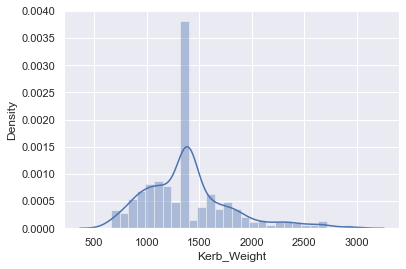

In [60]:
sns.distplot(data['Kerb_Weight'])

##### This distribution is pretty much normalised and hence we won't applying outliers' treatment here.

In [68]:
data1=data1.reset_index(drop=True)

# Checking the OLS assumptions

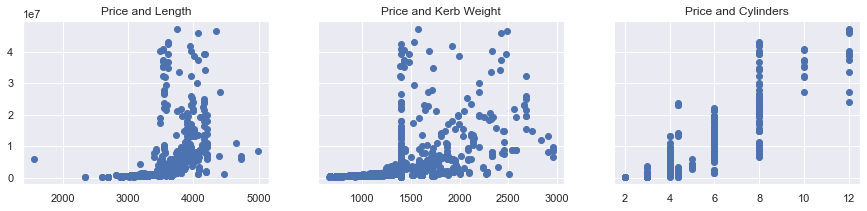

In [69]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data1['Length_new'],data1['Ex-Showroom_Price'])
ax1.set_title('Price and Length')
ax2.scatter(data1['Kerb_Weight'],data1['Ex-Showroom_Price'])
ax2.set_title('Price and Kerb Weight')
ax3.scatter(data1['Cylinders'],data1['Ex-Showroom_Price'])
ax3.set_title('Price and Cylinders')

plt.show()

# Relaxation of the assumptions
## Log transformation
##### As we can see from the above graphs that despite being one of the major predictors of the price variable, the scatter plots are not aligned enough to create a linear regression curve. So, in order to bring about a better fit we can try several methods, log-transformation being one of the most commonly used and easy to understand method which bears appreciable results.

In [71]:
log_price=np.log(data1['Ex-Showroom_Price'])
data1['log_price']=log_price
data1

,Instrument_Console,Power_Steering,Audiosystem,Cylinder_Configuration,Fuel_Type,Seat_Height_Adjustment,Engine_Location,Ventilation_System,Seats_Material,Power,...,Power_Windows,Keyless_Entry,Type,12v_Power_Outlet,Handbrake,Number_of_Airbags,Parking_Assistance,Length_new,Average_Mileage,log_price
0,4.138709e+06,3.724874e+06,5.241998e+06,2.047729e+06,6.053733e+06,1.134629e+06,2.320831e+07,7.730893e+05,1.018871e+06,3.190349e+05,...,0,0,0,2.0,0,3.80752,0,2697.0,23.600000,12.586791
1,4.138709e+06,3.724874e+06,6.934611e+05,2.047729e+06,6.053733e+06,1.134629e+06,2.320831e+07,5.797682e+06,1.018871e+06,3.190349e+05,...,1,0,0,2.0,0,3.80752,0,2697.0,23.600000,12.373479
2,4.138709e+06,3.724874e+06,6.934611e+05,2.047729e+06,4.922394e+05,1.134629e+06,2.320831e+07,7.784037e+05,1.018871e+06,3.190349e+05,...,1,0,0,2.0,0,3.80752,0,2697.0,43.919126,12.600345
3,4.138709e+06,3.724874e+06,5.241998e+06,2.047729e+06,6.053733e+06,1.134629e+06,2.320831e+07,7.730893e+05,1.018871e+06,3.190349e+05,...,0,0,1,2.0,0,3.80752,0,2697.0,22.750000,12.721193
4,4.138709e+06,3.724874e+06,6.934611e+05,2.047729e+06,6.053733e+06,1.134629e+06,2.320831e+07,7.784037e+05,1.018871e+06,3.190349e+05,...,1,0,0,2.0,0,3.80752,0,2697.0,23.600000,12.514377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,4.138709e+06,3.724874e+06,5.241998e+06,2.047729e+06,2.722578e+06,1.134629e+06,1.816440e+06,5.797682e+06,9.469575e+06,1.018604e+06,...,1,2,0,3.0,0,2.00000,1,3520.0,23.850000,14.079412
1234,4.138709e+06,3.724874e+06,5.241998e+06,2.047729e+06,2.722578e+06,1.134629e+06,1.816440e+06,5.797682e+06,9.469575e+06,1.018604e+06,...,1,2,0,3.0,0,6.00000,0,3520.0,23.850000,14.166871
1235,4.138709e+06,3.724874e+06,5.241998e+06,2.047729e+06,6.053733e+06,1.134629e+06,1.816440e+06,5.797682e+06,9.469575e+06,1.174185e+06,...,1,2,1,3.0,0,6.00000,0,3520.0,20.300000,14.173884
1236,4.138709e+06,3.724874e+06,5.241998e+06,2.047729e+06,6.053733e+06,1.134629e+06,1.816440e+06,5.797682e+06,1.018871e+06,1.174185e+06,...,1,0,1,3.0,0,2.00000,1,3520.0,16.050000,13.998665


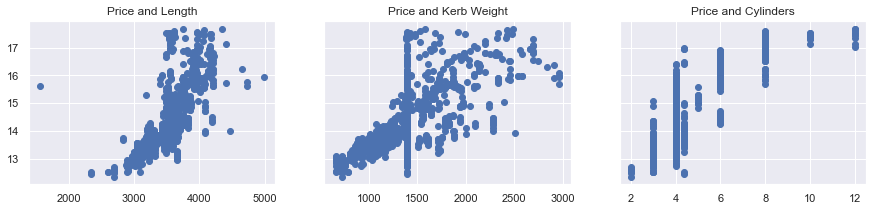

In [72]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data1['Length_new'],data1['log_price'])
ax1.set_title('Price and Length')
ax2.scatter(data1['Kerb_Weight'],data1['log_price'])
ax2.set_title('Price and Kerb Weight')
ax3.scatter(data1['Cylinders'],data1['log_price'])
ax3.set_title('Price and Cylinders')

plt.show()

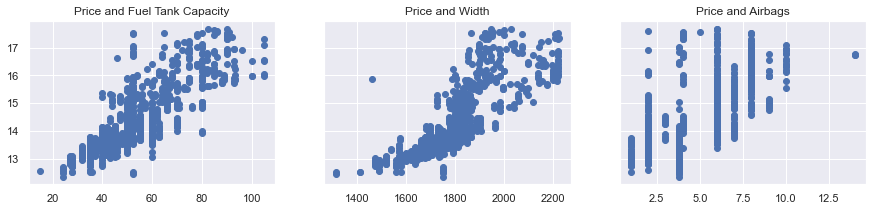

In [82]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data1['Fuel_Tank_Capacity'],data1['log_price'])
ax1.set_title('Price and Fuel Tank Capacity')
ax2.scatter(data1['Width'],data1['log_price'])
ax2.set_title('Price and Width')
ax3.scatter(data1['Number_of_Airbags'],data1['log_price'])
ax3.set_title('Price and Airbags')

plt.show()

In [87]:
df=data1.drop(['Ex-Showroom_Price'],axis=1)

### After checking the scatter plots and their variations we finally boil down our entire analysis on a few predictive parameters. It is also worth noticing that most of them were either correlated to others or were redundant factors which doesn't have much affect on the price variable.

In [94]:
cols=['Fuel_Tank_Capacity','Kerb_Weight','Length_new','Width','Cylinders', 'Average_Mileage','log_price']

In [95]:
data_preprocessed=df[cols]
data_preprocessed.head()

,Fuel_Tank_Capacity,Kerb_Weight,Length_new,Width,Cylinders,Average_Mileage,log_price
0,24.0,660.0,2697.0,1750.0,2.0,23.600000,12.586791
1,24.0,725.0,2697.0,1750.0,2.0,23.600000,12.373479
2,15.0,710.0,2697.0,1750.0,2.0,43.919126,12.600345
3,24.0,725.0,2697.0,1750.0,2.0,22.750000,12.721193
4,24.0,725.0,2697.0,1750.0,2.0,23.600000,12.514377


# LINEAR REGRESSION MODEL
## Declaring the inputs and the target sets for the model

In [96]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

# Scaling the finally preprocessed data for creating regression

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [98]:
inputs_scaled=scaler.transform(inputs)

# Splitting the data into train and test dataset

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train, y_test=train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

# Creating the regression

In [102]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [103]:
y_hat=reg.predict(x_train)

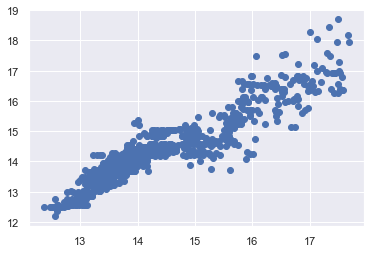

In [104]:
plt.scatter(y_train,y_hat)

plt.show()

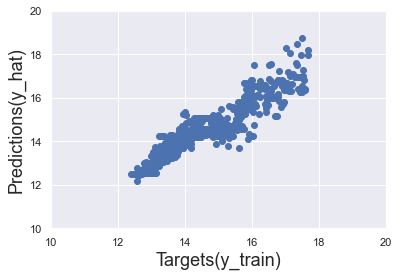

In [142]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions(y_hat)', size=18)
plt.xlim(10,20)
plt.ylim(10,20)
plt.show()

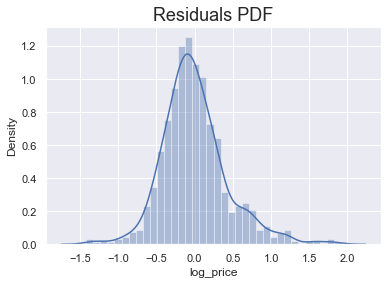

In [152]:
sns.distplot(y_train-y_hat)
plt.title('Residuals PDF', size=18)
plt.show()

In [128]:
reg.score(x_train,y_train)

0.8607047842116524

# Determining the weights and biases of a particular feature

In [129]:
reg.intercept_

14.288582122462513

In [130]:
reg.coef_

array([ 0.21902858,  0.03940373,  0.2340816 ,  0.30558128,  0.42878695,
       -0.00909748])

In [131]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Fuel_Tank_Capacity,0.219029
1,Kerb_Weight,0.039404
2,Length_new,0.234082
3,Width,0.305581
4,Cylinders,0.428787
5,Average_Mileage,-0.009097


### Weights give the direction of dependency of a price on particular variable and hence important in devising plans to meet the customer demands.

# Testing

In [132]:
y_hat_test = reg.predict(x_test)

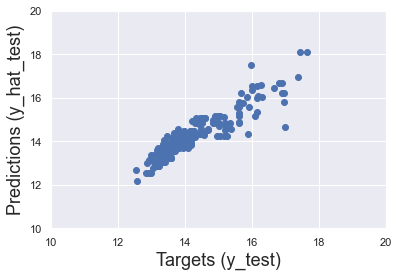

In [143]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(10,20)
plt.ylim(10,20)
plt.show()

In [144]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,2.766554e+06
1,8.951546e+05
2,1.215802e+06
3,7.259943e+05
4,1.367324e+07


In [145]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,2.766554e+06,NaN
1,8.951546e+05,NaN
2,1.215802e+06,NaN
3,7.259943e+05,NaN
4,1.367324e+07,NaN
...,...,...
243,4.348825e+06,NaN
244,1.821124e+06,NaN
245,1.550719e+06,NaN
246,1.706051e+06,NaN


In [146]:
y_test

655     14.291857
1185    13.448287
561     13.966406
893     13.390024
827     16.652950
          ...    
1171    15.617418
630     13.967862
546     13.742929
725     14.551717
481     13.813509
Name: log_price, Length: 248, dtype: float64

In [147]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    14.291857
1    13.448287
2    13.966406
3    13.390024
4    16.652950
Name: log_price, dtype: float64

In [148]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,2.766554e+06,1610180.0
1,8.951546e+05,692655.0
2,1.215802e+06,1162875.0
3,7.259943e+05,653452.0
4,1.367324e+07,17072000.0
...,...,...
243,4.348825e+06,6061200.0
244,1.821124e+06,1164569.0
245,1.550719e+06,929990.0
246,1.706051e+06,2088000.0


In [149]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,2.766554e+06,1610180.0,-1.156374e+06,71.816425
1,8.951546e+05,692655.0,-2.024996e+05,29.235270
2,1.215802e+06,1162875.0,-5.292680e+04,4.551375
3,7.259943e+05,653452.0,-7.254230e+04,11.101397
4,1.367324e+07,17072000.0,3.398757e+06,19.908369
...,...,...,...,...
243,4.348825e+06,6061200.0,1.712375e+06,28.251417
244,1.821124e+06,1164569.0,-6.565550e+05,56.377513
245,1.550719e+06,929990.0,-6.207291e+05,66.745786
246,1.706051e+06,2088000.0,3.819494e+05,18.292596


In [150]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,2.480000e+02,2.480000e+02,2.480000e+02,248.000000
mean,2.955878e+06,2.901733e+06,-5.414445e+04,30.947576
std,7.467024e+06,5.689570e+06,4.254024e+06,31.237520
min,1.924450e+05,2.796500e+05,-3.576247e+07,0.283008
25%,8.417388e+05,7.286750e+05,-2.831297e+05,12.614581
50%,1.188451e+06,9.887500e+05,-8.721795e+04,23.536334
75%,2.089182e+06,2.001750e+06,1.289839e+05,39.815410
max,7.330454e+07,4.594156e+07,2.132048e+07,351.038362


## From the analysis above it is very clear that the major factors affecting the predictive analytics or the prediction of price are 'Length', 'Average Mileage', 'Kerb Weight', 'Fuel Tank Capacity' and 'Width'. The corresponding predictions can also be easily extracted from the tables.

### Other than all these factors there are several other secondary factors which do contribute towards the price and are useful considering the business perspective to meet the market demands.